In [58]:
#Import the needed libraries 
import pandas as pd
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)


import numpy as np
from sklearn import linear_model
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
    
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error, r2_score

In [59]:
#read the input file
df = pd.read_csv('train.csv')

df.head(10)

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,Ex,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,NaN,Attchd,2003.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,Ex,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,Ex,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.0,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,Gd,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.0,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,Ex,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.0,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000
5,6,50,RL,85.0,14115,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,Mitchel,Norm,Norm,1Fam,1.5Fin,5,5,1993,1995,Gable,CompShg,VinylSd,VinylSd,None,0.0,TA,TA,Wood,Gd,TA,No,GLQ,732,Unf,0,64,796,GasA,Ex,Y,SBrkr,796,566,0,1362,1,0,1,1,1,1,TA,5,Typ,0,NaN,Attchd,1993.0,Unf,2,480,TA,TA,Y,40,30,0,320,0,0,NaN,MnPrv,Shed,700,10,2009,WD,Normal,143000
6,7,20,RL,75.0,10084,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,Somerst,Norm,Norm,1Fam,1Story,8,5,2004,2005,Gable,CompShg,VinylSd,VinylSd,Stone,186.0,Gd,TA,PConc,Ex,TA,Av,GLQ,1369,Unf,0,317,1686,GasA,Ex,Y,SBrkr,1694,0,0,1694,1,0,2,0,3,1,Gd,7,Typ,1,Gd,Attchd,2004.0,RFn,2,636,TA,TA,Y,255,57,0,0,0,0,NaN,NaN,NaN,0,8,2007,WD,Normal,307000
7,8,60,RL,NaN,10382,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,NWAmes,PosN,Norm,1Fam,2Story,7,6,1973,1973,Gable,CompShg,HdBoard,HdBoard,Stone,240.0,TA,TA,CBlock,Gd,TA,Mn,ALQ,859,BLQ,32,216,1107,GasA,Ex,Y,SBrkr,1107,983,0,2090,1,0,2,1,3,1,TA,7,Typ,2,TA,Attchd,1973.0,RFn,2,484,TA,TA,Y,235,204,228,0,0,0,NaN,NaN,Shed,350,11,2009,WD,Normal,200000
8,9,50,RM,51.0,6120,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,OldTown,Artery,Norm,1Fam,1.5Fin,7,5,1931,1950,Gable,CompShg,BrkFace,Wd Shng,None,0.0,TA,TA,BrkTil,TA,TA,No,Unf,0,Unf,0,952,952,GasA,Gd,Y,FuseF,1022,752,0,1774,0,0,2,0,2,2,TA,8,Min1,2,TA,Detchd,1931.0,Unf,2,468,Fa,TA,Y,90,0,205,0,0,0,NaN,NaN,NaN,0,4,2008,WD,Abnorml,129900
9,10,190,RL,50.0,7420,Pave,NaN,Reg,Lvl,AllPub,Corner,Gtl,BrkSide,Artery,Artery,2fmCon,1.5Unf,5,6,1939,1950,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,BrkTil,TA,TA,No,GLQ,851,Unf,0,140,991,Gas

In [60]:
#Check for categorical features
df.nunique()

Id               1460
MSSubClass         15
MSZoning            5
LotFrontage       110
LotArea          1073
Street              2
Alley               2
LotShape            4
LandContour         4
Utilities           2
LotConfig           5
LandSlope           3
Neighborhood       25
Condition1          9
Condition2          8
BldgType            5
HouseStyle          8
OverallQual        10
OverallCond         9
YearBuilt         112
YearRemodAdd       61
RoofStyle           6
RoofMatl            8
Exterior1st        15
Exterior2nd        16
MasVnrType          4
MasVnrArea        327
ExterQual           4
ExterCond           5
Foundation          6
BsmtQual            4
BsmtCond            4
BsmtExposure        4
BsmtFinType1        6
BsmtFinSF1        637
BsmtFinType2        6
BsmtFinSF2        144
BsmtUnfSF         780
TotalBsmtSF       721
Heating             6
HeatingQC           5
CentralAir          2
Electrical          5
1stFlrSF          753
2ndFlrSF          417
LowQualFin

In [61]:
df.isnull().sum()

#drop columns with too many null values
df = df.drop(['Alley','PoolQC','Fence','MiscFeature', 'Condition1', 'Condition2'], axis=1)

#apply mean to relevant null values
df = df.fillna(df.mean())

In [62]:
#convert categorical street into numerical for linear regression algorithm

df = pd.concat([df, pd.get_dummies(df['BldgType'])], axis=1)
df = pd.concat([df, pd.get_dummies(df['MSZoning'])], axis=1)            
df = pd.concat([df, pd.get_dummies(df['Neighborhood'])], axis=1)
df = pd.concat([df, pd.get_dummies(df['BsmtCond'])], axis=1)
df = pd.concat([df, pd.get_dummies(df['BsmtExposure'])], axis=1)
df = pd.concat([df, pd.get_dummies(df['BsmtFinType1'])], axis=1)
df = pd.concat([df, pd.get_dummies(df['BsmtFinType2'])], axis=1)
df = pd.concat([df, pd.get_dummies(df['BsmtQual'])], axis=1)
df = pd.concat([df, pd.get_dummies(df['CentralAir'])], axis=1)
df = pd.concat([df, pd.get_dummies(df['Electrical'])], axis=1)
df = pd.concat([df, pd.get_dummies(df['ExterCond'])], axis=1)
df = pd.concat([df, pd.get_dummies(df['Exterior1st'])], axis=1)
df = pd.concat([df, pd.get_dummies(df['Exterior2nd'])], axis=1)
df = pd.concat([df, pd.get_dummies(df['ExterQual'])], axis=1)
df = pd.concat([df, pd.get_dummies(df['FireplaceQu'])], axis=1)
df = pd.concat([df, pd.get_dummies(df['Foundation'])], axis=1)
df = pd.concat([df, pd.get_dummies(df['Functional'])], axis=1)
df = pd.concat([df, pd.get_dummies(df['GarageCond'])], axis=1)
df = pd.concat([df, pd.get_dummies(df['GarageQual'])], axis=1)
df = pd.concat([df, pd.get_dummies(df['GarageType'])], axis=1)
df = pd.concat([df, pd.get_dummies(df['Heating'])], axis=1)
df = pd.concat([df, pd.get_dummies(df['HeatingQC'])], axis=1)
df = pd.concat([df, pd.get_dummies(df['HouseStyle'])], axis=1)
df = pd.concat([df, pd.get_dummies(df['KitchenQual'])], axis=1)
df = pd.concat([df, pd.get_dummies(df['LandContour'])], axis=1)
df = pd.concat([df, pd.get_dummies(df['LandSlope'])], axis=1)
df = pd.concat([df, pd.get_dummies(df['LotConfig'])], axis=1)
df = pd.concat([df, pd.get_dummies(df['LotShape'])], axis=1)
df = pd.concat([df, pd.get_dummies(df['MasVnrType'])], axis=1)
df = pd.concat([df, pd.get_dummies(df['PavedDrive'])], axis=1)
df = pd.concat([df, pd.get_dummies(df['RoofMatl'])], axis=1)
df = pd.concat([df, pd.get_dummies(df['RoofStyle'])], axis=1)
df = pd.concat([df, pd.get_dummies(df['SaleCondition'])], axis=1)
df = pd.concat([df, pd.get_dummies(df['Street'])], axis=1)
df = pd.concat([df, pd.get_dummies(df['Utilities'])], axis=1)
df = pd.concat([df, pd.get_dummies(df['GarageFinish'])], axis=1)
df = pd.concat([df, pd.get_dummies(df['SaleType'])], axis=1)

#drop converted columns
df = df.drop(['BldgType','GarageFinish','SaleType', 'MSZoning','Neighborhood', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 'BsmtQual', 'CentralAir', 'Electrical', 'ExterCond', 'Exterior1st', 'Exterior2nd', 'ExterQual', 'FireplaceQu', 'Foundation', 'Functional', 'GarageCond', 'GarageQual', 'GarageType', 'Heating', 'HeatingQC', 'HouseStyle', 'KitchenQual', 'LandContour', 'LandSlope', 'LotConfig', 'LotShape', 'MasVnrType', 'PavedDrive', 'RoofMatl', 'RoofStyle', 'SaleCondition', 'Street', 'Utilities'], axis=1)
df.describe()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice,1Fam,2fmCon,Duplex,Twnhs,TwnhsE,C (all),FV,RH,RL,RM,Blmngtn,Blueste,BrDale,BrkSide,ClearCr,CollgCr,Crawfor,Edwards,Gilbert,IDOTRR,MeadowV,Mitchel,NAmes,NPkVill,NWAmes,NoRidge,NridgHt,OldTown,SWISU,Sawyer,SawyerW,Somerst,StoneBr,Timber,Veenker,Fa,Gd,Po,TA,Av,Gd,Mn,No,ALQ,BLQ,GLQ,LwQ,Rec,Unf,ALQ,BLQ,GLQ,LwQ,Rec,Unf,Ex,Fa,Gd,TA,N,Y,FuseA,FuseF,FuseP,Mix,SBrkr,Ex,Fa,Gd,Po,TA,AsbShng,AsphShn,BrkComm,BrkFace,CBlock,CemntBd,HdBoard,ImStucc,MetalSd,Plywood,Stone,Stucco,VinylSd,Wd Sdng,WdShing,AsbShng,AsphShn,Brk Cmn,BrkFace,CBlock,CmentBd,HdBoard,ImStucc,MetalSd,Other,Plywood,Stone,Stucco,VinylSd,Wd Sdng,Wd Shng,Ex,Fa,Gd,TA,Ex,Fa,Gd,Po,TA,BrkTil,CBlock,PConc,Slab,Stone,Wood,Maj1,Maj2,Min1,Min2,Mod,Sev,Typ,Ex,Fa,Gd,Po,TA,Ex,Fa,Gd,Po,TA,2Types,Attchd,Basment,BuiltIn,CarPort,Detchd,Floor,GasA,GasW,Grav,OthW,Wall,Ex,Fa,Gd,Po,TA,1.5Fin,1.5Unf,1Story,2.5Fin,2.5Unf,2Story,SFoyer,SLvl,Ex,Fa,Gd,TA,Bnk,HLS,Low,Lvl,Gtl,Mod,Sev,Corner,CulDSac,FR2,FR3,Inside,IR1,IR2,IR3,Reg,BrkCmn,BrkFace,None,Stone,N,P,Y,ClyTile,CompShg,Membran,Metal,Roll,Tar&Grv,WdShake,WdShngl,Flat,Gable,Gambrel,Hip,Mansard,Shed,Abnorml,AdjLand,Alloca,Family,Normal,Partial,Grvl,Pave,AllPub,NoSeWa,Fin,RFn,Unf,COD,CWD,Con,ConLD,ConLI,ConLw,New,Oth,WD
count,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.00000,1460.000000,1460.00000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.0000

In [63]:
df.isnull().sum()

Id               0
MSSubClass       0
LotFrontage      0
LotArea          0
OverallQual      0
OverallCond      0
YearBuilt        0
YearRemodAdd     0
MasVnrArea       0
BsmtFinSF1       0
BsmtFinSF2       0
BsmtUnfSF        0
TotalBsmtSF      0
1stFlrSF         0
2ndFlrSF         0
LowQualFinSF     0
GrLivArea        0
BsmtFullBath     0
BsmtHalfBath     0
FullBath         0
HalfBath         0
BedroomAbvGr     0
KitchenAbvGr     0
TotRmsAbvGrd     0
Fireplaces       0
GarageYrBlt      0
GarageCars       0
GarageArea       0
WoodDeckSF       0
OpenPorchSF      0
EnclosedPorch    0
3SsnPorch        0
ScreenPorch      0
PoolArea         0
MiscVal          0
MoSold           0
YrSold           0
SalePrice        0
1Fam             0
2fmCon           0
Duplex           0
Twnhs            0
TwnhsE           0
C (all)          0
FV               0
RH               0
RL               0
RM               0
Blmngtn          0
Blueste          0
BrDale           0
BrkSide          0
ClearCr     

In [64]:
#Scale the data
normalized_df=(df-df.mean())/df.std()

#Split the dataframe in X and y
x = df.drop('SalePrice',axis='columns')
y = df['SalePrice']




In [65]:
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2)

In [66]:
# Create linear regression object

reg = linear_model.LinearRegression(normalize=False)
reg.fit(X_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [68]:
y_pred = reg.predict(X_test)



Mean squared error: 1367904758.71
Variance score: 0.76


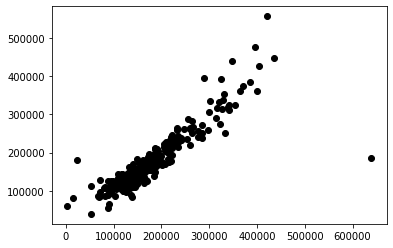

In [69]:
# The mean squared error
print("Mean squared error: %.2f"
      % mean_squared_error(y_test, y_pred))
# Explained variance score: 1 is perfect prediction
print('Variance score: %.2f' % r2_score(y_test, y_pred))


# Plot outputs
plt.scatter(y_pred, y_test,  color='black')


In [73]:
y_test['pred'] = y_pred
y_test.columns = ["Id", "SalePrice"]
y_test.to_csv('data1.csv',header=True)

In [ ]:
#So given the distribution of the data, a linear regression model is not appropriate at all!